In [31]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
audio_file = r'D:\UET\Speech Processing\homework2\audio\khue_c1\A.wav'

In [33]:
ipd.Audio(audio_file)

In [34]:
signal, sr = librosa.load(audio_file)

print(signal) # audio time series

print(sr) # sample rate of signal

[-1.5258789e-05 -1.5258789e-05 -4.5776367e-05 ... -3.0517578e-05
  0.0000000e+00 -1.0681152e-04]
22050


In [35]:
# total sample of this waveform
signal.shape

(10240,)

In [36]:
# extracting MFCCs
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
mfccs.shape

(13, 21)

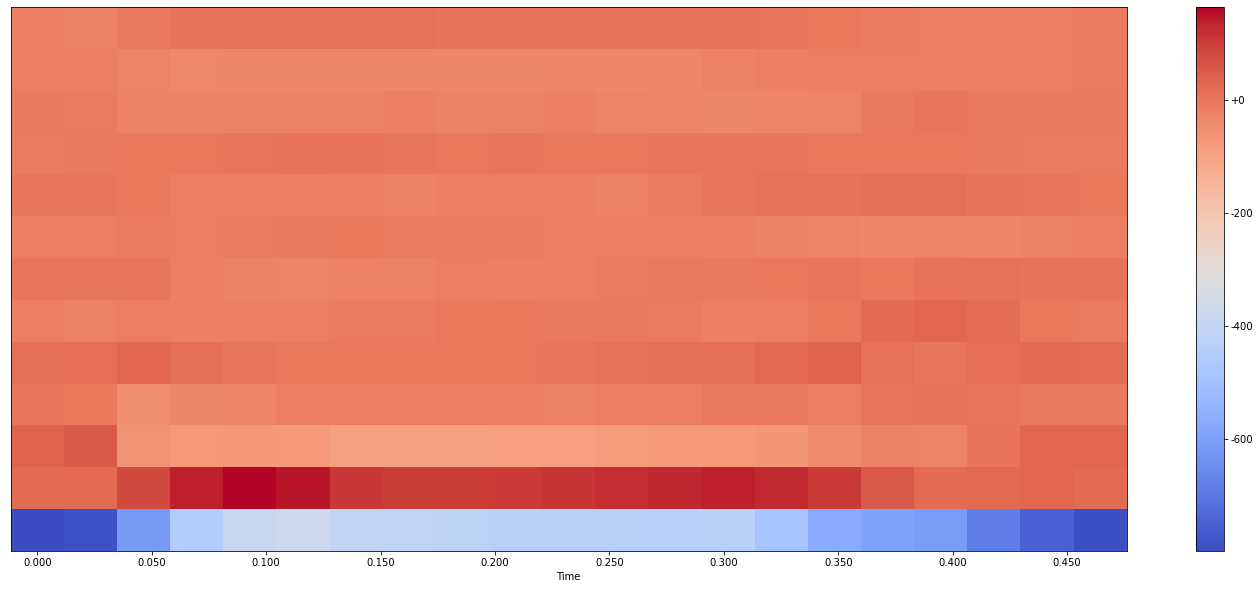

In [37]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [38]:
# first derivative
delta_mfccs = librosa.feature.delta(mfccs)
print(delta_mfccs)
delta_mfccs.shape

[[ 5.1277218e+01  5.1277218e+01  5.1277218e+01  5.1277218e+01
   5.1277218e+01  3.3970264e+01  1.1644298e+01 -2.9146361e+00
  -7.0110025e+00 -5.8881998e+00 -6.7346492e+00 -1.3745774e+01
  -2.0115343e+01 -2.5397116e+01 -3.3098381e+01 -4.0989449e+01
  -4.6452026e+01 -4.6452026e+01 -4.6452026e+01 -4.6452026e+01
  -4.6452026e+01]
 [ 1.0010703e+01  1.0010703e+01  1.0010703e+01  1.0010703e+01
   1.0010703e+01  3.9544559e+00 -2.5991101e+00 -5.2701592e+00
  -3.2031388e+00  1.4713922e+00  4.5712929e+00  2.9309611e+00
  -2.3993330e+00 -8.8904333e+00 -1.3729554e+01 -1.6248571e+01
  -1.7374504e+01 -1.7374504e+01 -1.7374504e+01 -1.7374504e+01
  -1.7374504e+01]
 [-1.7280558e+01 -1.7280558e+01 -1.7280558e+01 -1.7280558e+01
  -1.7280558e+01 -1.2154558e+01 -3.7611482e+00 -1.6754383e+00
  -5.2206546e-01  1.0281030e+00  3.0478272e+00  5.0415683e+00
   7.6725330e+00  9.0911732e+00  1.1504528e+01  1.4249398e+01
   1.5511597e+01  1.5511597e+01  1.5511597e+01  1.5511597e+01
   1.5511597e+01]
 [-1.9424486e-01

(13, 21)

In [39]:
# second derivative
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
print(delta2_mfccs)
delta2_mfccs.shape

[[-2.69619846e+01 -2.69619846e+01 -2.69619846e+01 -2.69619846e+01
  -2.69619846e+01 -2.84119339e+01 -1.56502008e+01 -3.56772852e+00
   1.66462255e+00  2.56044102e+00 -1.90147245e+00 -7.84661293e+00
  -9.73085308e+00 -8.21417236e+00 -7.54818106e+00 -6.47036409e+00
  -2.89079976e+00 -2.89079976e+00 -2.89079976e+00 -2.89079976e+00
  -2.89079976e+00]
 [-1.13708124e+01 -1.13708124e+01 -1.13708124e+01 -1.13708124e+01
  -1.13708124e+01 -9.83749866e+00 -2.75209308e+00  3.36621761e+00
   6.17891598e+00  4.72659731e+00  7.33969152e-01 -2.49925017e+00
  -6.80890226e+00 -9.22719860e+00 -7.01227140e+00 -2.46360373e+00
   2.28737402e+00  2.28737402e+00  2.28737402e+00  2.28737402e+00
   2.28737402e+00]
 [ 7.61899567e+00  7.61899567e+00  7.61899567e+00  7.61899567e+00
   7.61899567e+00  7.79411173e+00  1.67116976e+00  1.57765472e+00
   2.36495423e+00  1.76058340e+00  8.57686818e-01  1.80350947e+00
   3.00337839e+00  2.22689295e+00  2.39261198e+00  2.89500928e+00
   1.17729628e+00  1.17729628e+00  1.1

(13, 21)

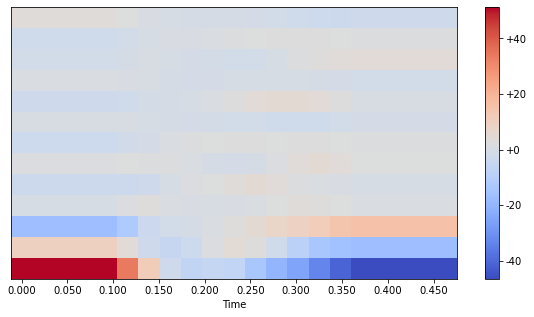

In [40]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

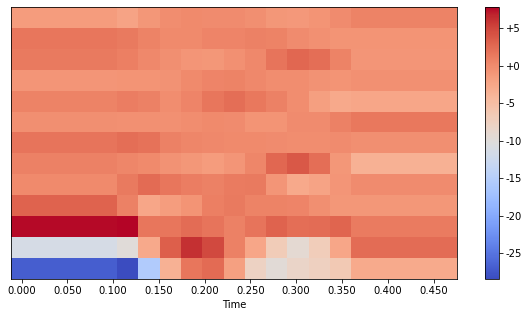

In [41]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(delta2_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [42]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [43]:
mfccs_features.shape

(39, 21)

In [44]:
mfccs_features

array([[-7.96981812e+02, -7.83366394e+02, -6.15144653e+02,
        -4.53048981e+02, -3.88294495e+02, -3.79772491e+02,
        -4.09578827e+02, -4.17256165e+02, -4.23508240e+02,
        -4.30115051e+02, -4.30702850e+02, -4.36308624e+02,
        -4.37280701e+02, -4.35994202e+02, -4.88110413e+02,
        -5.70407104e+02, -5.91394165e+02, -6.10796631e+02,
        -6.85652588e+02, -7.51649292e+02, -7.88451294e+02],
       [ 2.29851246e+01,  2.53388824e+01,  8.44065933e+01,
         1.38087784e+02,  1.63254822e+02,  1.47518997e+02,
         1.06997482e+02,  1.01466499e+02,  1.02396713e+02,
         1.03538109e+02,  1.13274376e+02,  1.19661369e+02,
         1.32444611e+02,  1.38687683e+02,  1.28596222e+02,
         1.03413940e+02,  5.40823441e+01,  2.36614399e+01,
         2.73305779e+01,  3.09099236e+01,  2.32313290e+01],
       [ 3.88505096e+01,  5.14316406e+01, -5.83446198e+01,
        -7.83981857e+01, -7.41044388e+01, -7.71040115e+01,
        -9.39150085e+01, -9.49618607e+01, -9.31010666e